# Import dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Replace 'your_dataset.csv' with the actual filename and path if needed
file_path = '/Users/gaston/Downloads/HRIS_June_Random.xlsx - Sheet1.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
df.head()


,Global ID,Gender,Employee Group,Employee Subgroup,Band Group,Employee Band,Band Equivalence,Status,Age Group,Tenure,...,Time in Position,Manager Flag,Zone,Country,City,Global Function,Inbev Entity Description,Special Group,Language,Inelegible
0,3,MALE,Executives(Bd I-VII),Permanent,V-VII,VI-B,VI,Active,25 YRS BUT LESS THAN 35 YRS OF AGE,5 YEARS BUT LESS THAN 10 YEARS SERVICE,...,6 MONTHS TO 1 YEAR,No,APC,India,Bangalore,PROCUREMENT,PROCUREMENT,No,English,No
1,14,MALE,Executives(Bd I-VII),Executive(BandV-VII),V-VII,VI-B,VI,Active,35 YRS BUT LESS THAN 45 YRS OF AGE,6 MONTHS BUT LESS THAN 1 YEAR SERVICE,...,6 MONTHS TO 1 YEAR,No,GHQ,India,Bengaluru,SOLUTIONS,SOLUTIONS,No,English,No
2,16,MALE,Executives(Bd I-VII),Executive(BandV-VII),V-VII,V-B,V,Active,25 YRS BUT LESS THAN 35 YRS OF AGE,1 YEAR BUT LESS THAN 5 YEARS SERVICE,...,1 YEAR TO 3 YEARS,Yes,GHQ,India,Bengaluru,SOLUTIONS,SOLUTIONS,No,English,No
3,19,MALE,Executives(Bd I-VII),Executive(BandV-VII),V-VII,VII-B,VII,Active,LESS THAN 25 YRS OF AGE,6 MONTHS BUT LESS THAN 1 YEAR SERVICE,...,6 MONTHS TO 1 YEAR,No,GHQ,India,Bengaluru,SOLUTIONS,SOLUTIONS,No,English,No
4,21,MALE,Executives(Bd I-VII),Executive(BandV-VII),V-VII,VII-A,VII,Active,35 YRS BUT LESS THAN 45 YRS OF AGE,1 YEAR BUT LESS THAN 5 YEARS SERVICE,...,LESS THAN 6 MONTHS,Yes,GHQ,India,Bengaluru,SOLUTIONS,SOLUTIONS BSC,No,English,No


# Explore dataset, including rows, columns, blank values and data types

In [2]:
# Count the number of missing values (blanks) in each column
missing_values = df.isnull().sum()

# Get the data types of each column
data_types = df.dtypes

# Display the result
print("Number of missing values by column:")
print(missing_values)

print("\nData types of each column:")
print(data_types)

Number of missing values by column:
Global ID                      0
Gender                      2200
Employee Group              2203
Employee Subgroup           2219
Band Group                  2200
Employee Band               2202
Band Equivalence            2201
Status                      2498
Age Group                   2210
Tenure                      2608
Time in Band                2900
Time in Position            3258
Manager Flag                   0
Zone                           0
Country                     2215
City                        2568
Global Function                0
Inbev Entity Description    2424
Special Group                 15
Language                      15
Inelegible                     0
dtype: int64

Data types of each column:
Global ID                    int64
Gender                      object
Employee Group              object
Employee Subgroup           object
Band Group                  object
Employee Band               object
Band Equivalence    

# Remove data that is not useful for the project: inactive employees

In [3]:
# Count employees by Status
status_counts = df['Status'].value_counts()

# Display the result
print("Employees by status:")
print(status_counts)

Employees by status:
Active      36820
Inactive      307
Name: Status, dtype: int64


In [4]:
# Remove rows where 'Status' is 'Inactive'
df = df[df['Status'] == 'Active']

# Verify the changes
status_counts = df['Status'].value_counts()
print("Employees by status after removing 'Inactive' employees:")
print(status_counts)

Employees by status after removing 'Inactive' employees:
Active    36820
Name: Status, dtype: int64


# Remove data that is not useful for the project: columns Employee Subgroup, Employee Band, City, Inbev Entity Description, Special Group and Inelegibility

In [5]:
# List of columns to drop
columns_to_drop = ['Employee Subgroup', 'Employee Band', 'City', 'Inbev Entity Description', 'Special Group', 'Inelegible']

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the updated DataFrame
df.head()

,Global ID,Gender,Employee Group,Band Group,Band Equivalence,Status,Age Group,Tenure,Time in Band,Time in Position,Manager Flag,Zone,Country,Global Function,Language
0,3,MALE,Executives(Bd I-VII),V-VII,VI,Active,25 YRS BUT LESS THAN 35 YRS OF AGE,5 YEARS BUT LESS THAN 10 YEARS SERVICE,1 YEAR TO 3 YEARS,6 MONTHS TO 1 YEAR,No,APC,India,PROCUREMENT,English
1,14,MALE,Executives(Bd I-VII),V-VII,VI,Active,35 YRS BUT LESS THAN 45 YRS OF AGE,6 MONTHS BUT LESS THAN 1 YEAR SERVICE,6 MONTHS TO 1 YEAR,6 MONTHS TO 1 YEAR,No,GHQ,India,SOLUTIONS,English
2,16,MALE,Executives(Bd I-VII),V-VII,V,Active,25 YRS BUT LESS THAN 35 YRS OF AGE,1 YEAR BUT LESS THAN 5 YEARS SERVICE,1 YEAR TO 3 YEARS,1 YEAR TO 3 YEARS,Yes,GHQ,India,SOLUTIONS,English
3,19,MALE,Executives(Bd I-VII),V-VII,VII,Active,LESS THAN 25 YRS OF AGE,6 MONTHS BUT LESS THAN 1 YEAR SERVICE,6 MONTHS TO 1 YEAR,6 MONTHS TO 1 YEAR,No,GHQ,India,SOLUTIONS,English
4,21,MALE,Executives(Bd I-VII),V-VII,VII,Active,35 YRS BUT LESS THAN 45 YRS OF AGE,1 YEAR BUT LESS THAN 5 YEARS SERVICE,1 YEAR TO 3 YEARS,LESS THAN 6 MONTHS,Yes,GHQ,India,SOLUTIONS,English


# Run ETL processes to standardize data: Languages

In [6]:
# Count employees by language
language_counts = df['Language'].value_counts()

# Display the result
print("Employees by language:")
print(language_counts)


Employees by language:
English            11822
Spanish (MAZ)       8746
Portuguese (BR)     5697
Chinese             4201
Spanish (SAZ)       1620
Russian             1171
French (CAN)         875
Ukrainian            687
Dutch                574
Korean               517
German               256
French               239
Vietnamese           191
Italian               89
Spanish (Spain)       71
Japanese              64
Name: Language, dtype: int64


In [7]:
# Assuming 'Language' is the column containing languages in your DataFrame
# Replace variations of Spanish with a single value 'Spanish'
df['Language'] = df['Language'].replace({'Spanish (MAZ)': 'Spanish', 'Spanish (SAZ)': 'Spanish', 'Spanish (Spain)': 'Spanish'})
df['Language'] = df['Language'].replace({'French (CAN)': 'French'})


# Verify the changes
language_counts = df['Language'].value_counts()
print("Employees by language:")
print(language_counts)

Employees by language:
English            11822
Spanish            10437
Portuguese (BR)     5697
Chinese             4201
Russian             1171
French              1114
Ukrainian            687
Dutch                574
Korean               517
German               256
Vietnamese           191
Italian               89
Japanese              64
Name: Language, dtype: int64


# Run ETL processes to standardize data: Global Function

In [8]:
# Count employees by global function
global_function_counts = df['Global Function'].value_counts()

# Display the result
print("Employees by global function:")
print(global_function_counts)

Employees by global function:
SALES                        10659
SUPPLY                        9445
SOLUTIONS                     7619
LOGISTICS                     3216
MARKETING                     1544
PEOPLE                        1241
PROCUREMENT                    896
FINANCE                        823
DIRECT TO CONSUMER             662
LEGAL / CORPORATE AFFAIRS      582
GENERAL MANAGEMENT             116
SUSTAINABILITY                  12
SALES                            3
Procurement                      1
SUPPLY                           1
Name: Global Function, dtype: int64


In [9]:
# Convert all entries within Global Function to lowercase
df['Global Function'] = df['Global Function'].str.lower()

# Standardize SALES and PROCUREMENT
df['Global Function'] = df['Global Function'].replace({'sales ': 'sales', 'procurement': 'procurement','supply ':'supply'})

# Verify the changes
function_counts = df['Global Function'].value_counts()
print("Number of employees by global function after standardization:")
print(function_counts)

Number of employees by global function after standardization:
sales                        10662
supply                        9446
solutions                     7619
logistics                     3216
marketing                     1544
people                        1241
procurement                    897
finance                        823
direct to consumer             662
legal / corporate affairs      582
general management             116
sustainability                  12
Name: Global Function, dtype: int64


# Run ETL processes to standardize data: Gender

In [10]:
# Count employees by gender
gender_counts = df['Gender'].value_counts()

# Display the result
print("Employees by gender:")
print(gender_counts)

Employees by gender:
MALE       24149
FEMALE     12659
UNKNOWN       12
Name: Gender, dtype: int64


In [11]:
# Convert all entries within Gender to lowercase
df['Gender'] = df['Gender'].str.lower()

# Standardize MALE and FEMALE
df['Gender'] = df['Gender'].replace({'male': 'male', 'female': 'female'})

# Verify the changes
gender_counts = df['Gender'].value_counts()
print("Number of employees by gender:")
print(gender_counts)

Number of employees by gender:
male       24149
female     12659
unknown       12
Name: Gender, dtype: int64


# Run ETL processes to standardize data: Band Equivalance

In [12]:
# Count employees by Band Equivalence
band_equivalence_counts = df['Band Equivalence'].value_counts()

# Display the result
print("Employees by band:")
print(band_equivalence_counts)

Employees by band:
VII    18012
VI     11185
V       5279
IV      1607
III      501
II       150
I         57
SLT       16
0         12
CEO        1
Name: Band Equivalence, dtype: int64


In [13]:
# Convert all entries within Band Equivalence
df['Band Equivalence'] = df['Band Equivalence'].str.lower()

# Standardize MALE and FEMALE
df['Band Equivalence'] = df['Band Equivalence'].replace({'vi ': 'vi'})

# Verify the changes
band_equivalence_counts = df['Band Equivalence'].value_counts()
print("Number of employees by band:")
print(band_equivalence_counts)

Number of employees by band:
vii    18012
vi     11185
v       5279
iv      1607
iii      501
ii       150
i         57
slt       16
0         12
ceo        1
Name: Band Equivalence, dtype: int64


# Run ETL processes to standardize data: Manager Flag

In [14]:
# Count employees by Manager Flag
manager_flag_counts = df['Manager Flag'].value_counts()

# Display the result
print("Employees by manager flag:")
print(manager_flag_counts)

Employees by manager flag:
No     21067
Yes    15753
Name: Manager Flag, dtype: int64


In [15]:
## No changes are needed

# Run ETL processes to standardize data: Zone

In [16]:
# Count employees by Zone
zone_counts = df['Zone'].value_counts()

# Display the result
print("Employees by Zone:")
print(zone_counts)

Employees by Zone:
MAZ              8800
SAZ              7302
APC              5377
NAZ              4841
EUR              4196
GHQ              3120
AFR              2560
GROWTH GROUPS     624
Name: Zone, dtype: int64


In [17]:
## No changes are needed

# Identify the current status: Global managerial representation

In [18]:
# Assuming 'Zone' and 'Gender' are the column names in your DataFrame
# Exclude rows where 'Gender' is 'unknown'
filtered_df_unknown_gender = df[df['Gender'] != 'unknown']

# Group by 'Manager Status' and 'Gender', and calculate the size of each group
gender_by_managerial_status = filtered_df_unknown_gender.groupby(['Manager Flag', 'Gender']).size().unstack()

# Display the result
print("Distribution of employees by managerial status:")
print(gender_by_managerial_status)

Distribution of employees by managerial status:
Gender        female   male
Manager Flag               
No              8378  12680
Yes             4281  11469


In [19]:
# Calculate the total count (male + female) for each Manager Status
total_by_manager_status = gender_by_managerial_status.sum(axis=1)

# Calculate the percentages
percentage_gender_by_managerial_status = gender_by_managerial_status.divide(total_by_manager_status, axis=0) * 100

# Display the result
print("Percentage distribution of employees by managerial status:")
print(percentage_gender_by_managerial_status)

Percentage distribution of employees by managerial status:
Gender           female       male
Manager Flag                      
No            39.785355  60.214645
Yes           27.180952  72.819048


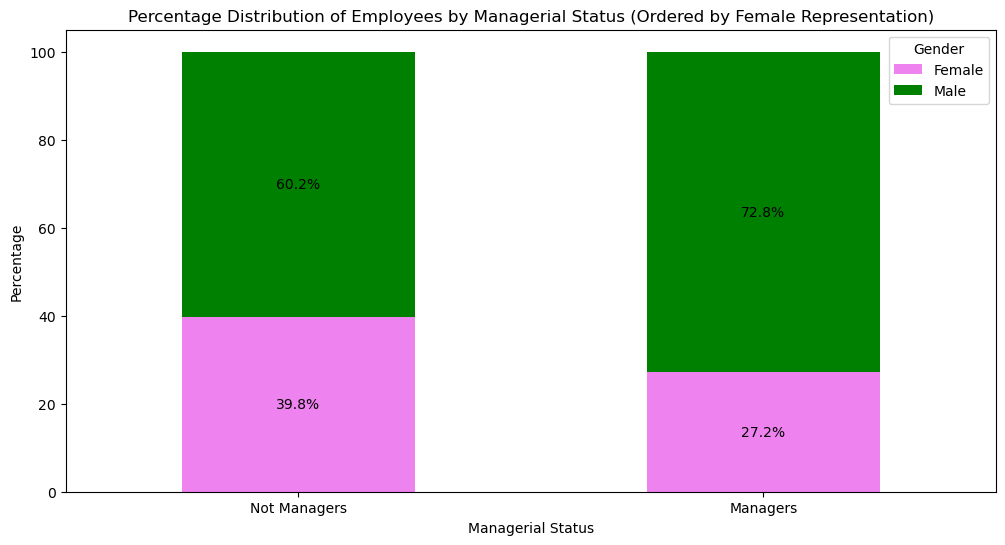

In [20]:
# Define colors for female and male
colors = {'female': 'violet', 'male': 'green'}

# Calculate the total percentage of female representation for each Manager status
total_percentage_female_managerial_status = percentage_gender_by_managerial_status['female']

# Sort the manager status based on the total percentage of female representation in descending order
sorted_manager_status = total_percentage_female_managerial_status.sort_values(ascending=False).index

# Reorder the DataFrame and plot the percentage distribution with custom colors
ax_2 = percentage_gender_by_managerial_status.loc[sorted_manager_status].plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in percentage_gender_by_managerial_status.columns])

# Add labels and title
plt.title('Percentage Distribution of Employees by Managerial Status (Ordered by Female Representation)')
plt.xlabel('Managerial Status')
plt.ylabel('Percentage')
plt.legend(title='Gender', labels=['Female', 'Male'])

# Annotate percentages inside each bar with 1 decimal for the second plot
for p in ax_2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax_2.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Replace 'Yes' with 'Managers' and 'No' with 'Not Managers' on the x-axis
plt.xticks(range(len(sorted_manager_status)), ['Managers' if val == 'Yes' else 'Not Managers' for val in sorted_manager_status], rotation=0)

# Show the plot
plt.show()

# Identify the current status: Zone representation

In [21]:
# Group by 'Zone' and 'Gender', and calculate the size of each group
gender_by_zone = filtered_df_unknown_gender.groupby(['Zone', 'Gender']).size().unstack()

# Display the result
print("Distribution of employees by gender and zone (excluding unknowns):")
print(gender_by_zone)

Distribution of employees by gender and zone (excluding unknowns):
Gender         female  male
Zone                       
AFR               816  1744
APC              1735  3642
EUR              1606  2589
GHQ              1009  2110
GROWTH GROUPS     242   382
MAZ              2921  5879
NAZ              1607  3224
SAZ              2723  4579


In [22]:
# Calculate the total count (male + female) for each Zone
total_by_zone = gender_by_zone.sum(axis=1)

# Calculate the percentages
percentage_gender_by_zone = gender_by_zone.divide(total_by_zone, axis=0) * 100

# Display the result
print("Percentage distribution of employees by gender and zone:")
print(percentage_gender_by_zone)


Percentage distribution of employees by gender and zone:
Gender            female       male
Zone                               
AFR            31.875000  68.125000
APC            32.267063  67.732937
EUR            38.283671  61.716329
GHQ            32.350112  67.649888
GROWTH GROUPS  38.782051  61.217949
MAZ            33.193182  66.806818
NAZ            33.264335  66.735665
SAZ            37.291153  62.708847


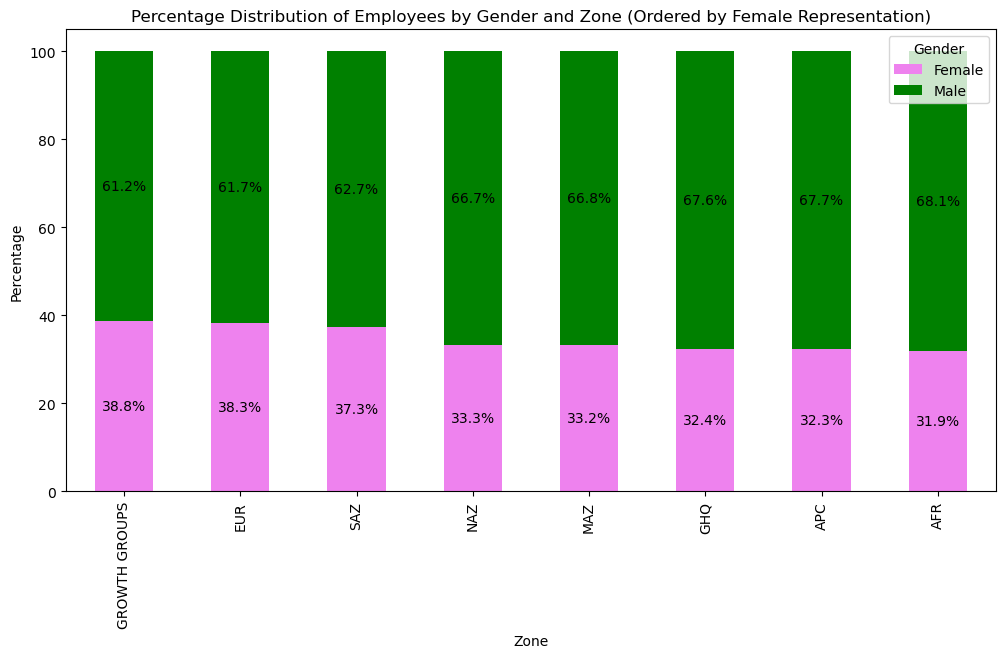

In [23]:
# Define colors for female, male, and unknown
colors = {'female': 'violet', 'male': 'green', 'unknown': 'grey'}

# Calculate the total percentage of female representation for each zone
total_percentage_female = percentage_gender_by_zone['female']

# Sort the zones based on the total percentage of female representation in descending order
sorted_zones = total_percentage_female.sort_values(ascending=False).index

# Reorder the DataFrame and plot the percentage distribution with custom colors
ax = percentage_gender_by_zone.loc[sorted_zones].plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in percentage_gender_by_zone.columns])

# Add labels and title
plt.title('Percentage Distribution of Employees by Gender and Zone (Ordered by Female Representation)')
plt.xlabel('Zone')
plt.ylabel('Percentage')
plt.legend(title='Gender', labels=['Female', 'Male', 'Unknown'])

# Annotate percentages inside each bar with 1 decimal
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Show the plot
plt.show()

# Identify the current status: Function representation

In [24]:
# Group by 'Global Function' and 'Gender', and calculate the size of each group
gender_by_global_function = filtered_df_unknown_gender.groupby(['Global Function', 'Gender']).size().unstack()

# Display the result
print("Distribution of employees by global function:")
print(gender_by_global_function)

Distribution of employees by global function:
Gender                     female  male
Global Function                        
direct to consumer            254   408
finance                       357   465
general management             40    74
legal / corporate affairs     290   292
logistics                    1021  2194
marketing                     859   684
people                        867   373
procurement                   433   464
sales                        3106  7553
solutions                    3111  4507
supply                       2312  7132
sustainability                  9     3


In [25]:
# Calculate the total count (male + female) for each Global Function
total_by_global_function = gender_by_global_function.sum(axis=1)

# Calculate the percentages
percentage_gender_by_global_function = gender_by_global_function.divide(total_by_global_function, axis=0) * 100

# Display the result
print("Percentage distribution of employees by global function:")
print(percentage_gender_by_global_function)

Percentage distribution of employees by global function:
Gender                        female       male
Global Function                                
direct to consumer         38.368580  61.631420
finance                    43.430657  56.569343
general management         35.087719  64.912281
legal / corporate affairs  49.828179  50.171821
logistics                  31.757387  68.242613
marketing                  55.670771  44.329229
people                     69.919355  30.080645
procurement                48.272018  51.727982
sales                      29.139694  70.860306
solutions                  40.837490  59.162510
supply                     24.481152  75.518848
sustainability             75.000000  25.000000


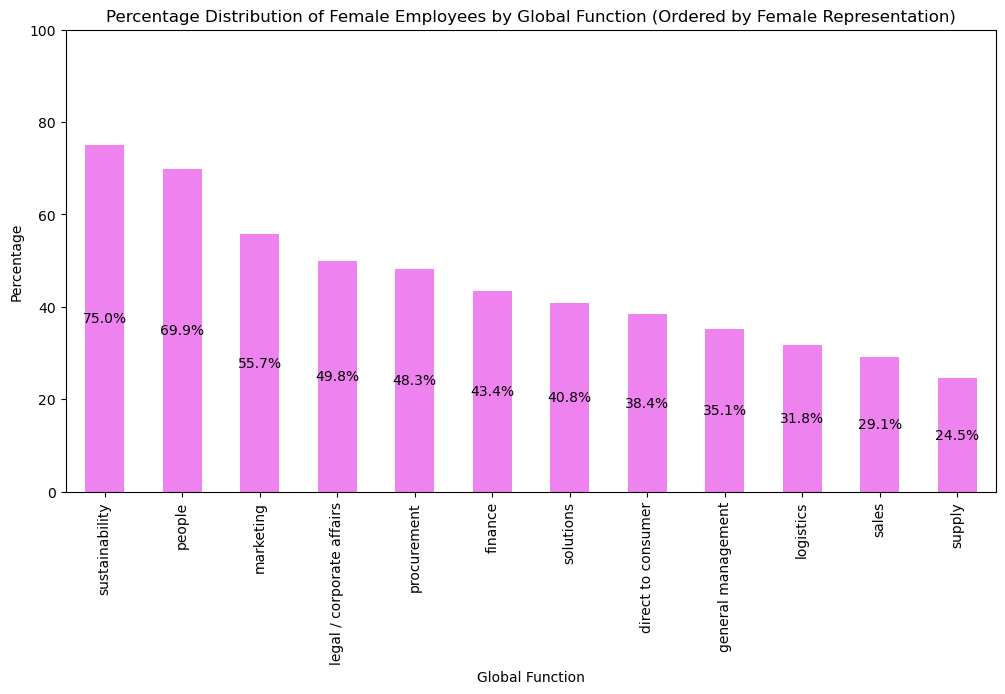

In [26]:
# Select only the 'female' column for plotting
female_representation_by_global_function = percentage_gender_by_global_function['female']

# Sort the global functions based on the total percentage of female representation in descending order
sorted_global_functions = female_representation_by_global_function.sort_values(ascending=False).index

# Reorder the DataFrame and plot the bar chart
ax_global_function = female_representation_by_global_function.loc[sorted_global_functions].plot(kind='bar', figsize=(12, 6), color='violet')

# Add labels and title
plt.title('Percentage Distribution of Female Employees by Global Function (Ordered by Female Representation)')
plt.xlabel('Global Function')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentage values are between 0 and 100

# Annotate percentages inside each bar with 1 decimal
for p in ax_global_function.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax_global_function.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Show the plot
plt.show()

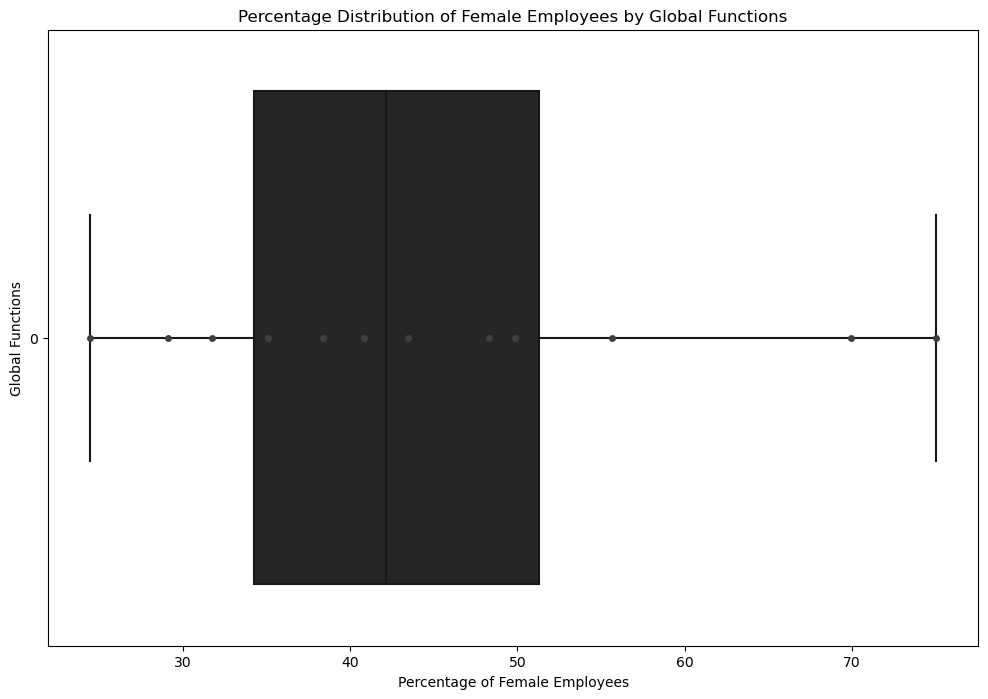

In [27]:
# Create a combined plot with box plot and swarm plot to show outliers
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=percentage_gender_by_global_function['female'], orient="h", palette="dark:.25")
sns.swarmplot(data=percentage_gender_by_global_function['female'], orient="h", color=".25", ax=ax)

# Custumize title and labels
plt.title('Percentage Distribution of Female Employees by Global Functions')
plt.xlabel('Percentage of Female Employees')
plt.ylabel('Global Functions')
plt.show()

In [28]:
## All values outside the box are outliers, so Sustainability, People, Marketing, Sales and Supply are outliers

# Identify the current status: Band 0-III representation

In [29]:
# Group by 'Band Equivalence' and 'Gender', and calculate the size of each group
gender_by_band_equivalence = filtered_df_unknown_gender.groupby(['Band Equivalence', 'Gender']).size().unstack()

# Replace NaN with 0 in the gender_by_band_equivalence DataFrame
gender_by_band_equivalence = gender_by_band_equivalence.fillna(0)

# Display the updated result
print("Distribution of employees by band (NaN replaced with 0):")
print(gender_by_band_equivalence)

Distribution of employees by band (NaN replaced with 0):
Gender            female     male
Band Equivalence                 
0                    1.0     11.0
ceo                  0.0      1.0
i                    4.0     52.0
ii                  24.0    126.0
iii                127.0    374.0
iv                 453.0   1154.0
slt                  2.0     14.0
v                 1834.0   3443.0
vi                3961.0   7220.0
vii               6253.0  11754.0


In [30]:
# Filter the DataFrame to exclude bands 'iv', 'v', 'vi', and 'vii'
excluded_bands = ['iv', 'v', 'vi', 'vii']
filtered_gender_by_band_equivalence = gender_by_band_equivalence[~gender_by_band_equivalence.index.isin(excluded_bands)]

# Display the updated result
print("Distribution of employees excluding bands 'iv', 'v', 'vi', 'vii':")
print(filtered_gender_by_band_equivalence)

Distribution of employees excluding bands 'iv', 'v', 'vi', 'vii':
Gender            female   male
Band Equivalence               
0                    1.0   11.0
ceo                  0.0    1.0
i                    4.0   52.0
ii                  24.0  126.0
iii                127.0  374.0
slt                  2.0   14.0


In [31]:
# Calculate the total number of female and male employees
total_female_band_O_III = filtered_gender_by_band_equivalence['female'].sum()
total_male_band_O_III = filtered_gender_by_band_equivalence['male'].sum()

# Display the result
print("Total number of female employees in bands 0-III:", total_female_band_O_III)
print("Total number of male employees in bands 0-III:", total_male_band_O_III)

Total number of female employees in bands 0-III: 158.0
Total number of male employees in bands 0-III: 578.0


In [32]:
# Calculate percentage of females band 0-III:

percentage_female_band_0_III = total_female_band_O_III / (total_female_band_O_III + total_male_band_O_III)

# Display the result
print("Percentage females in bands 0-III:", percentage_female_band_0_III)

Percentage females in bands 0-III: 0.21467391304347827


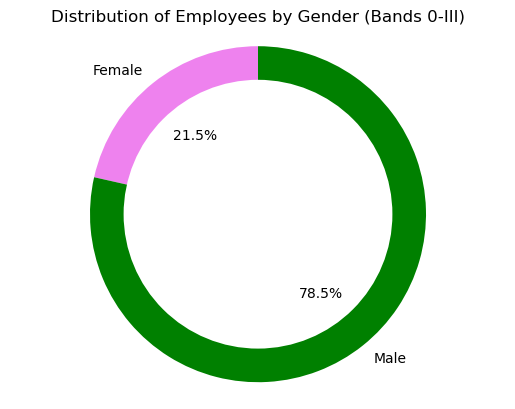

In [33]:
# Data
labels = ['Female', 'Male']
sizes = [total_female_band_O_III, total_male_band_O_III]

# Plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=['violet', 'green'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle at the center to create a doughnut chart
center_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Title
plt.title('Distribution of Employees by Gender (Bands 0-III)')

# Show the plot
plt.show()

# Identify the Current State: Overall female representation

In [34]:
# Calculate the total number of females and males in gender_by_age_group
total_overall_females = gender_by_global_function['female'].sum()
total_overall_males = gender_by_global_function['male'].sum()

# Calculate the percentage of females
percentage_overall_females = (total_overall_females / (total_overall_females + total_overall_males)) * 100

# Display the results
print("Total Females:", total_overall_females)
print("Total Males:", total_overall_males)
print("Percentage of Females:", percentage_overall_females)

Total Females: 12659
Total Males: 24149
Percentage of Females: 34.391980004346884


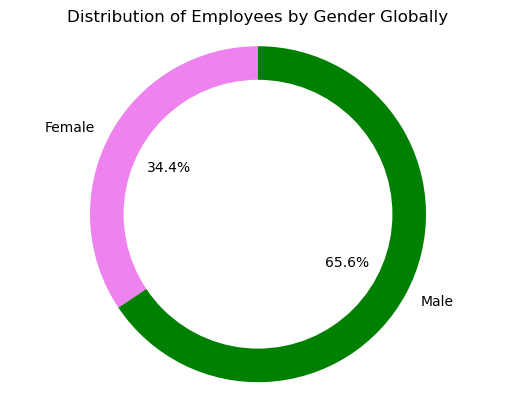

In [35]:
# Data
labels = ['Female', 'Male']
sizes = [total_overall_females, total_overall_males]

# Plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=['violet', 'green'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle at the center to create a doughnut chart
center_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Title
plt.title('Distribution of Employees by Gender Globally')

# Show the plot
plt.show()

# Identify the Gap: Global Managerial Representation

In [36]:
# Calculate current_percentage and total_managers
current_percentage = percentage_gender_by_managerial_status.loc['Yes', 'female']
total_managers = gender_by_managerial_status.loc['Yes'].sum()

# Set your target_percentage
target_percentage_global_managerial = 40.0  # Your global goal

# Calculate the Gap Percentage
gap_percentage = target_percentage_global_managerial - current_percentage

# Calculate the Gap Quantity
gap_quantity = (target_percentage_global_managerial / 100) * total_managers - (current_percentage / 100) * total_managers

# Display the results
print(f"Target Percentage: {target_percentage_global_managerial}%")
print(f"Current Percentage: {current_percentage:.2f}%")
print(f"Total Managers: {total_managers}")
print(f"Gap Percentage: {gap_percentage:.2f}%")
print(f"Gap Quantity: {gap_quantity:.0f} managers")

Target Percentage: 40.0%
Current Percentage: 27.18%
Total Managers: 15750
Gap Percentage: 12.82%
Gap Quantity: 2019 managers


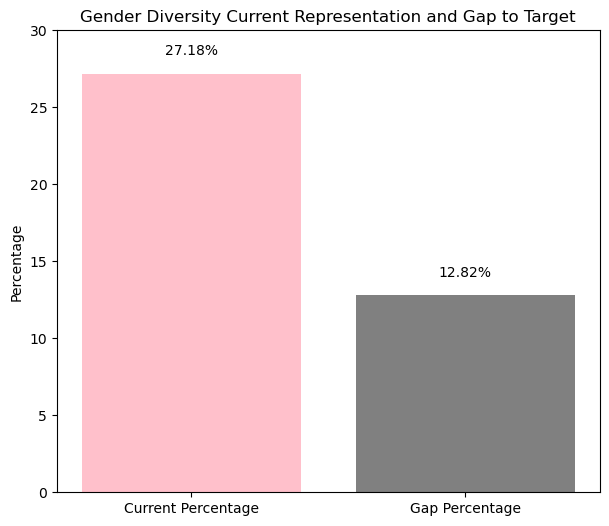

In [37]:
# Data for plotting
categories = ['Current Percentage', 'Gap Percentage']
percentages = [current_percentage, gap_percentage]

# Plotting the bar chart
plt.figure(figsize=(7, 6))
plt.bar(categories, percentages, color=['pink', 'grey'])
plt.ylabel('Percentage')
plt.title('Gender Diversity Current Representation and Gap to Target')
plt.ylim(0, 30)  # Adjust the y-axis limits based on your data range

# Adding text annotations
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

# Identify the Gap: Zone Representation

In [38]:
## There is no need to identify the gap as all Zones have a representation above 20% as indicated in the minimum requirements

# Identify the Gap: Function Representation

In [39]:
# Set the target percentage
target_percentage_global_function = 30.0

# Identify global functions with female representation below the target
below_target_functions = percentage_gender_by_global_function[percentage_gender_by_global_function['female'] < target_percentage_global_function].index

# Calculate the gap percentage for each function
gap_percentage_by_function = target_percentage_global_function - percentage_gender_by_global_function.loc[below_target_functions, 'female']

# Calculate the total number of female employees across all functions
total_female_employees = gender_by_global_function['female'].sum()

# Calculate the gap quantity in terms of female employees
gap_quantity_female_employees = (target_percentage_global_function * total_by_global_function.sum() / 100) - (total_female_employees * target_percentage_global_function / 100)

# Display the result
print("Global functions with female representation below the target:")
print(below_target_functions)

print("\nGap percentage for each function:")
print(gap_percentage_by_function)

Global functions with female representation below the target:
Index(['sales', 'supply'], dtype='object', name='Global Function')

Gap percentage for each function:
Global Function
sales     0.860306
supply    5.518848
Name: female, dtype: float64


In [40]:
# Display the corrected result
print("Total number of female employees across all functions:", total_female_employees)
print("Gap quantity in terms of female employees:", gap_quantity_female_employees)

Total number of female employees across all functions: 12659
Gap quantity in terms of female employees: 7244.7


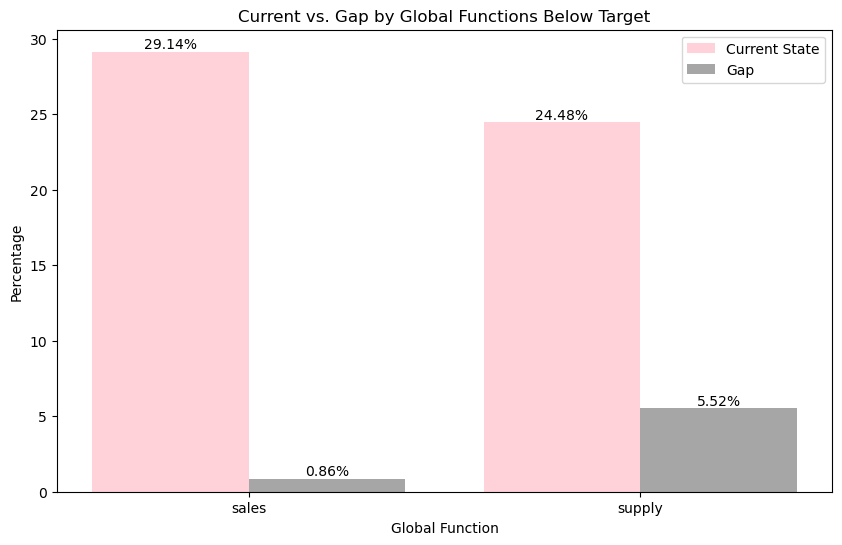

In [41]:
# Data preparation
functions_below_target = ['sales', 'supply']
current_percentages = percentage_gender_by_global_function.loc[functions_below_target, 'female']
gap_percentages = target_percentage_global_function - current_percentages

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar for current state
current_bars = ax.bar(np.arange(len(functions_below_target)) - 0.2, current_percentages, width=0.4, label='Current State', color='pink', alpha=0.7)

# Bar for gap in percentages
gap_bars = ax.bar(np.arange(len(functions_below_target)) + 0.2, gap_percentages, width=0.4, label='Gap', color='grey', alpha=0.7)

# Add percentages above each bar
for bar, percentage in zip(current_bars, current_percentages):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

for bar, percentage in zip(gap_bars, gap_percentages):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Current vs. Gap by Global Functions Below Target')
plt.xlabel('Global Function')
plt.ylabel('Percentage')
plt.xticks(np.arange(len(functions_below_target)), functions_below_target)
plt.legend()

# Show the plot
plt.show()


# Identify the Gap: Band 0-III Representation

In [42]:
# Calculate the total number of employees in bands 0-III
total_employees_band_O_III = filtered_gender_by_band_equivalence.sum(axis=1).sum()

# Calculate the percentage of female employees in bands 0-III
percentage_female_band_O_III = (total_female_band_O_III / total_employees_band_O_III) * 100

# Set the target percentage
target_percentage_band_O_III = 33.0

# Calculate the gap percentage
gap_percentage_band_O_III = target_percentage_band_O_III - percentage_female_band_O_III

# Display the results
print("Percentage of female employees in bands 0-III:", percentage_female_band_O_III)
print("Target Percentage:", target_percentage_band_O_III)
print("Gap Percentage:", gap_percentage_band_O_III)

Percentage of female employees in bands 0-III: 21.467391304347828
Target Percentage: 33.0
Gap Percentage: 11.532608695652172


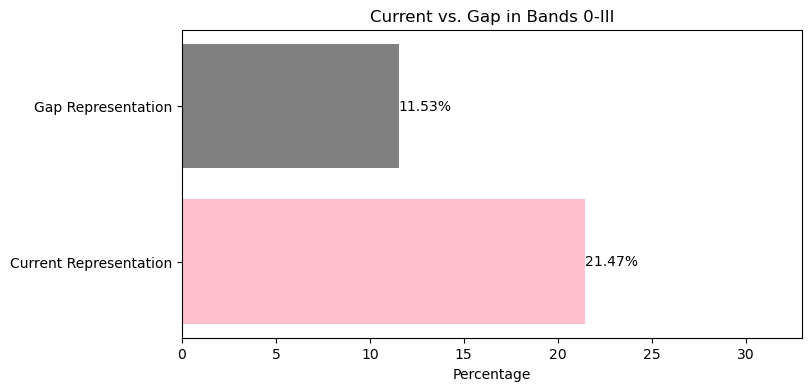

In [43]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(['Current Representation', 'Gap Representation'], [percentage_female_band_O_III, gap_percentage_band_O_III], color=['pink', 'grey'])

# Add labels and title
ax.set_title('Current vs. Gap in Bands 0-III')
ax.set_xlabel('Percentage')
ax.set_xlim(0, 33)

# Add percentages inside the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', ha='left', va='center')

# Show the plot
plt.show()

# Explore correlations and other dimensions that may influence gender representation and propose actions: Age Group

In [44]:
# Group by 'Age Group' and 'Gender', and calculate the size of each group
gender_by_age_group = filtered_df_unknown_gender.groupby(['Age Group', 'Gender']).size().unstack()

# Display the result
print("Distribution of employees by age group:")
print(gender_by_age_group)

Distribution of employees by age group:
Gender                              female   male
Age Group                                        
25 YRS BUT LESS THAN 35 YRS OF AGE    7487  10371
35 YRS BUT LESS THAN 45 YRS OF AGE    3730   8681
45 YRS BUT LESS THAN 55 YRS OF AGE     935   3605
55 YRS OR OLDER                        204   1180
LESS THAN 25 YRS OF AGE                303    312


In [45]:
# Calculate the total count (male + female) for each Age Group
total_by_age_group = gender_by_age_group.sum(axis=1)

# Calculate the percentages
percentage_gender_by_age_group = gender_by_age_group.divide(total_by_age_group, axis=0) * 100

# Display the result
print("Percentage distribution of employees by age group:")
print(percentage_gender_by_age_group)

Percentage distribution of employees by age group:
Gender                                 female       male
Age Group                                               
25 YRS BUT LESS THAN 35 YRS OF AGE  41.925188  58.074812
35 YRS BUT LESS THAN 45 YRS OF AGE  30.053984  69.946016
45 YRS BUT LESS THAN 55 YRS OF AGE  20.594714  79.405286
55 YRS OR OLDER                     14.739884  85.260116
LESS THAN 25 YRS OF AGE             49.268293  50.731707


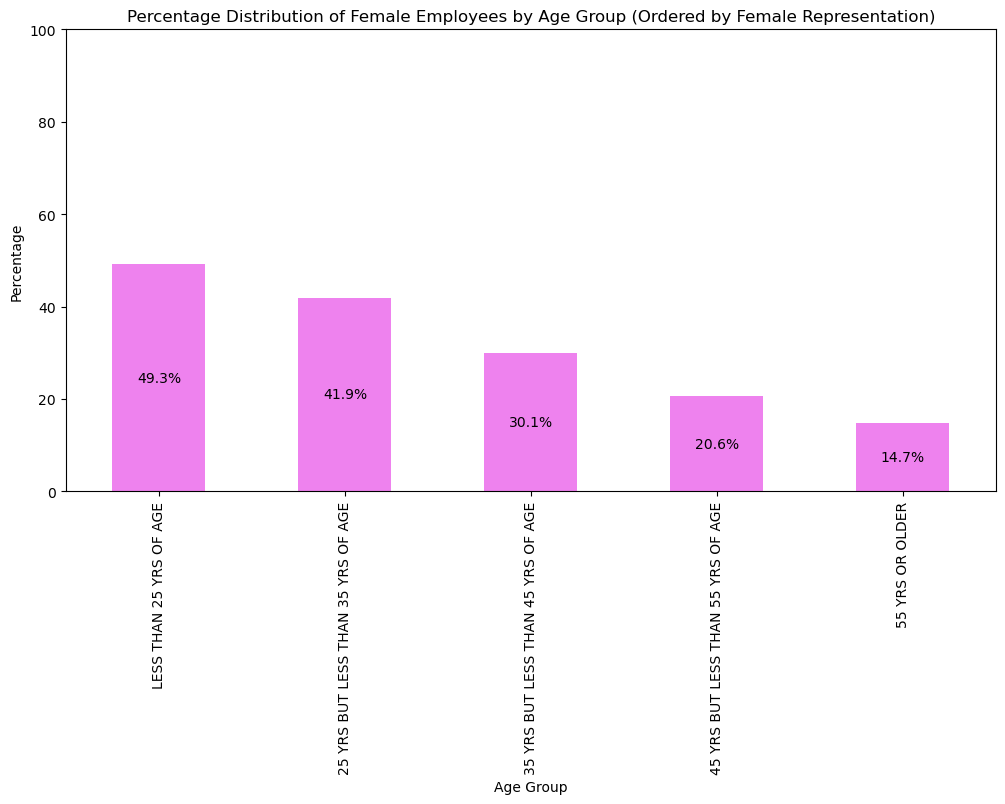

In [46]:
# Select only the 'female' column for plotting
female_representation_by_age_group = percentage_gender_by_age_group['female']

# Sort the age groups based on the total percentage of female representation in descending order
sorted_age_group = female_representation_by_age_group.sort_values(ascending=False).index

# Reorder the DataFrame and plot the bar chart
ax_age_group = female_representation_by_age_group.loc[sorted_age_group].plot(kind='bar', figsize=(12, 6), color='violet')

# Add labels and title
plt.title('Percentage Distribution of Female Employees by Age Group (Ordered by Female Representation)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentage values are between 0 and 100

# Annotate percentages inside each bar with 1 decimal
for p in ax_age_group.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax_age_group.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Show the plot
plt.show()

In [47]:
# Set the target female representation to 30%
target_representation = 30

# Calculate the required number of females to be hired as of the current total
required_females_45_55 = (target_representation / 100) * total_by_age_group["45 YRS BUT LESS THAN 55 YRS OF AGE"]
required_females_55_older = (target_representation / 100) * total_by_age_group["55 YRS OR OLDER"]

# Display the results
print("\nTarget Female Representation:", target_representation)
print("\nNeeded Females as Of the Current Headcount (45 YRS BUT LESS THAN 55 YRS OF AGE):", required_females_45_55)
print("\nNeeded Females as Of the Current Headcount (55 YRS OR OLDER):", required_females_55_older)


Target Female Representation: 30

Needed Females as Of the Current Headcount (45 YRS BUT LESS THAN 55 YRS OF AGE): 1362.0

Needed Females as Of the Current Headcount (55 YRS OR OLDER): 415.2


In [48]:
# Define the required number of females for each age group
rounded_required_females_45_55 = round(required_females_45_55)
rounded_required_females_55_older = round(required_females_55_older)

# Update the number of females in the DataFrame
gender_by_age_group.loc['45 YRS BUT LESS THAN 55 YRS OF AGE', 'female'] = rounded_required_females_45_55
gender_by_age_group.loc['55 YRS OR OLDER', 'female'] = rounded_required_females_55_older

# Display the updated result
print("Updated gender distribution by age group after 30% female representation target:")
print(gender_by_age_group)

Updated gender distribution by age group after 30% female representation target:
Gender                              female   male
Age Group                                        
25 YRS BUT LESS THAN 35 YRS OF AGE    7487  10371
35 YRS BUT LESS THAN 45 YRS OF AGE    3730   8681
45 YRS BUT LESS THAN 55 YRS OF AGE    1362   3605
55 YRS OR OLDER                        415   1180
LESS THAN 25 YRS OF AGE                303    312


In [49]:
# Calculate the total number of females and males in gender_by_age_group
total_females = gender_by_age_group['female'].sum()
total_males = gender_by_age_group['male'].sum()

# Calculate the percentage of females
percentage_females_by_age_group = (total_females / (total_females + total_males)) * 100

# Display the results
print("Total Females:", total_females)
print("Total Males:", total_males)
print("Percentage of Females:", percentage_females_by_age_group)

Total Females: 13297
Total Males: 24149
Percentage of Females: 35.509800779789565


# Explore correlations and other dimensions that may influence gender representation and propose actions: Country

In [50]:
# Group by 'Country' and 'Gender', and calculate the size of each group
gender_by_country = filtered_df_unknown_gender.groupby(['Country', 'Gender']).size().unstack()

# Filter for those countries with more than 500 employees
filtered_gender_by_country = gender_by_country[(gender_by_country['female'].fillna(0) + gender_by_country['male'].fillna(0)) >= 500]

# Display the result
print("Distribution of employees by country with +500 employees:")
print(filtered_gender_by_country)

Distribution of employees by country with +500 employees:
Gender         female    male
Country                      
Argentina       444.0   734.0
Belgium         312.0   621.0
Brazil         2471.0  4145.0
Canada          325.0   546.0
China          1450.0  2759.0
Colombia        555.0   932.0
Great Britain   201.0   382.0
India           533.0  1564.0
Mexico         1712.0  3681.0
Russia          460.0   705.0
South Africa    542.0   910.0
South Korea     125.0   388.0
USA            1383.0  2832.0
Ukraine         315.0   330.0


In [51]:
# Calculate the total count (male + female) for each Country
total_by_country = filtered_gender_by_country.sum(axis=1)

# Calculate the percentages
percentage_gender_by_country = filtered_gender_by_country.divide(total_by_country, axis=0) * 100

# Display the result
print("Percentage distribution of employees by countries with 500+ employees:")
print(percentage_gender_by_country)

Percentage distribution of employees by countries with 500+ employees:
Gender            female       male
Country                            
Argentina      37.691002  62.308998
Belgium        33.440514  66.559486
Brazil         37.348851  62.651149
Canada         37.313433  62.686567
China          34.449988  65.550012
Colombia       37.323470  62.676530
Great Britain  34.476844  65.523156
India          25.417263  74.582737
Mexico         31.744854  68.255146
Russia         39.484979  60.515021
South Africa   37.327824  62.672176
South Korea    24.366472  75.633528
USA            32.811388  67.188612
Ukraine        48.837209  51.162791


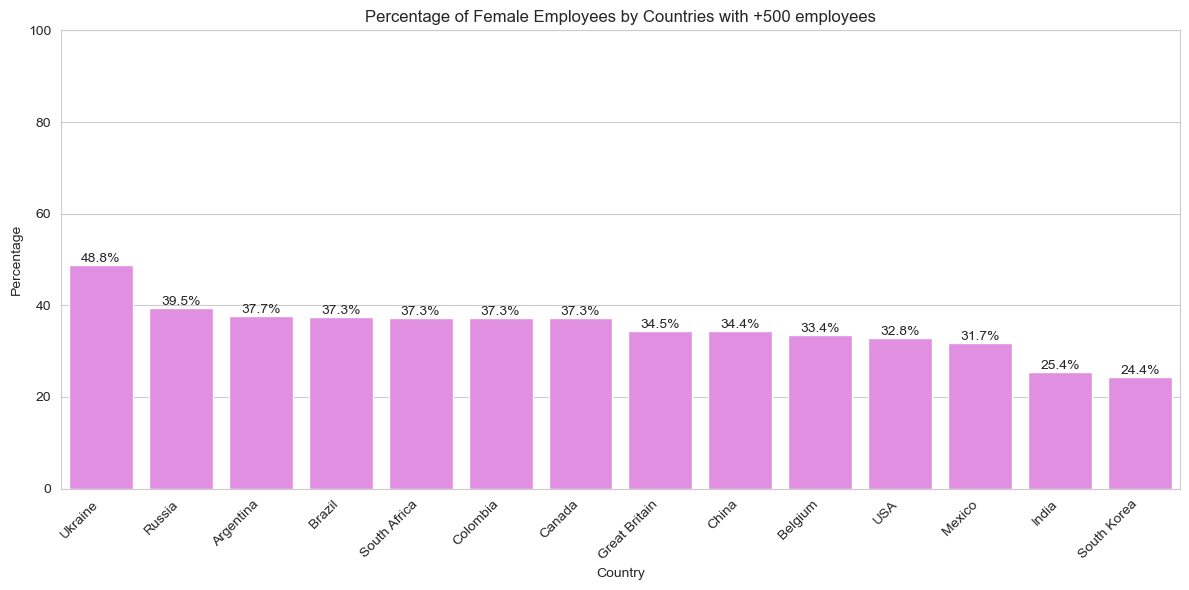

In [52]:
# Select only the 'female' column for plotting
female_representation_by_country = percentage_gender_by_country['female']

# Sort the age groups based on the total percentage of female representation in descending order
sorted_country = female_representation_by_country.sort_values(ascending=False).index

# Set style
sns.set_style("whitegrid")

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_country, y=[female_representation_by_country[country] for country in sorted_country], color='violet')

# Add labels and title
plt.title('Percentage of Female Employees by Countries with +500 employees')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentage values are between 0 and 100

# Annotate percentages inside each bar with 1 decimal
for idx, country in enumerate(sorted_country):
    plt.text(idx, female_representation_by_country[country], f'{female_representation_by_country[country]:.1f}%', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# Sort the DataFrame based on the percentage of females in ascending order
sorted_gender_by_country = percentage_gender_by_country.sort_values(by='female')

# Select the bottom 7 countries
bottom_7_countries = sorted_gender_by_country.head(7)

# Display the result
print("Bottom 7 countries with the lowest female representation:")
print(bottom_7_countries)

Bottom 7 countries with the lowest female representation:
Gender            female       male
Country                            
South Korea    24.366472  75.633528
India          25.417263  74.582737
Mexico         31.744854  68.255146
USA            32.811388  67.188612
Belgium        33.440514  66.559486
China          34.449988  65.550012
Great Britain  34.476844  65.523156


In [54]:
# Extract the list of countries from 'bottom_7_countries'
bottom_7_countries_list = bottom_7_countries.index.tolist()

# Filter the DataFrame to only include data for the specified countries
filtered_gender_bottom_7_countries_list = filtered_gender_by_country.loc[bottom_7_countries_list]

# Sort the DataFrame based on the 'female' column in descending order
sorted_filtered_gender_bottom_7_countries_list = filtered_gender_bottom_7_countries_list.sort_values(by='female', ascending=False)

# Display the result
print("Headcount distribution in bottom 7 countries with +500 employees:")
print(sorted_filtered_gender_bottom_7_countries_list)

Headcount distribution in bottom 7 countries with +500 employees:
Gender         female    male
Country                      
Mexico         1712.0  3681.0
China          1450.0  2759.0
USA            1383.0  2832.0
India           533.0  1564.0
Belgium         312.0   621.0
Great Britain   201.0   382.0
South Korea     125.0   388.0


In [55]:
# Set the target female representation to 35%
target_representation_by_country = 35

# Calculate the required number of females to be hired as of the current total
required_females_mexico = round((target_representation_by_country / 100) * total_by_country["Mexico"])
required_females_china = round((target_representation_by_country / 100) * total_by_country["China"])
required_females_usa = round((target_representation_by_country / 100) * total_by_country["USA"])
required_females_india = round((target_representation_by_country / 100) * total_by_country["India"])
required_females_belgium = round((target_representation_by_country / 100) * total_by_country["Belgium"])
required_females_great_britain = round((target_representation_by_country / 100) * total_by_country["Great Britain"])
required_females_south_korea = round((target_representation_by_country / 100) * total_by_country["South Korea"])

# Display the results
print("\nTarget Female Representation:", target_representation)
print("\nNeeded Females as Of the Current Headcount (Mexico):", required_females_mexico)
print("Needed Females as Of the Current Headcount (China):", required_females_china)
print("Needed Females as Of the Current Headcount (USA):", required_females_usa)
print("Needed Females as Of the Current Headcount (India):", required_females_india)
print("Needed Females as Of the Current Headcount (Belgium):", required_females_belgium)
print("Needed Females as Of the Current Headcount (Great Britain):", required_females_great_britain)
print("Needed Females as Of the Current Headcount (South Korea):", required_females_south_korea)


Target Female Representation: 30

Needed Females as Of the Current Headcount (Mexico): 1888
Needed Females as Of the Current Headcount (China): 1473
Needed Females as Of the Current Headcount (USA): 1475
Needed Females as Of the Current Headcount (India): 734
Needed Females as Of the Current Headcount (Belgium): 327
Needed Females as Of the Current Headcount (Great Britain): 204
Needed Females as Of the Current Headcount (South Korea): 180


In [56]:
# Update the number of females in the Bottom 7 List with the required to the target by country
sorted_filtered_gender_bottom_7_countries_list.loc['Mexico', 'female'] = required_females_mexico
sorted_filtered_gender_bottom_7_countries_list.loc['China', 'female'] = required_females_china
sorted_filtered_gender_bottom_7_countries_list.loc['USA', 'female'] = required_females_usa
sorted_filtered_gender_bottom_7_countries_list.loc['India', 'female'] = required_females_india
sorted_filtered_gender_bottom_7_countries_list.loc['Belgium', 'female'] = required_females_belgium
sorted_filtered_gender_bottom_7_countries_list.loc['Great Britain', 'female'] = required_females_great_britain
sorted_filtered_gender_bottom_7_countries_list.loc['South Korea', 'female'] = required_females_south_korea

# Display the updated result
print("Updated gender distribution by bottom 7 countries with +500 employees after 35% female representation target:")
print(sorted_filtered_gender_bottom_7_countries_list)

Updated gender distribution by bottom 7 countries with +500 employees after 35% female representation target:
Gender         female    male
Country                      
Mexico         1888.0  3681.0
China          1473.0  2759.0
USA            1475.0  2832.0
India           734.0  1564.0
Belgium         327.0   621.0
Great Britain   204.0   382.0
South Korea     180.0   388.0


In [57]:
# Update the number of females in the Gendery by Country Global DF with the required to the target by country
gender_by_country.loc['Mexico', 'female'] = required_females_mexico
gender_by_country.loc['China', 'female'] = required_females_china
gender_by_country.loc['USA', 'female'] = required_females_usa
gender_by_country.loc['India', 'female'] = required_females_india
gender_by_country.loc['Belgium', 'female'] = required_females_belgium
gender_by_country.loc['Great Britain', 'female'] = required_females_great_britain
gender_by_country.loc['South Korea', 'female'] = required_females_south_korea

In [58]:
# Calculate the total number of females and males in sorted_filtered_gender_bottom_7_countries_list
total_females_by_country = gender_by_country['female'].sum()
total_males_by_country = gender_by_country['male'].sum()

# Calculate the percentage of females
percentage_females_by_country = (total_females_by_country / (total_females_by_country + total_males_by_country)) * 100

# Display the results
print("Total Females:", total_females_by_country)
print("Total Males:", total_males_by_country)
print("Percentage of Females:", percentage_females_by_country)

Total Females: 13198.0
Total Males: 24123.0
Percentage of Females: 35.36346828863107


# Explore correlations and other dimensions that may influence gender representation and propose actions: Time in Position

# Aproach: promote females in band IV with +3 years of experience

In [59]:
# Filter the DataFrame to exclude rows where 'Band Equivalence' is 'iv', 'v', 'vi', and 'vii'
filtered_df_exclude_bands = filtered_df_unknown_gender[~filtered_df_unknown_gender['Band Equivalence'].isin(['ceo','slt','0','iii','ii','i', 'v', 'vi', 'vii'])]

# Group by 'Time in Position' and 'Gender', and calculate the size of each group
gender_by_time_in_position = filtered_df_exclude_bands.groupby(['Time in Position', 'Gender']).size().unstack()

# Display the result
print("Distribution of employees Band IV by time in position:")
print(gender_by_time_in_position)

Distribution of employees Band IV by time in position:
Gender              female  male
Time in Position                
1 YEAR TO 3 YEARS      184   493
3 YEARS TO 5 YEARS      44   147
5 YEARS OR MORE         11    64
6 MONTHS TO 1 YEAR     110   244
LESS THAN 6 MONTHS      87   182


In [60]:
# Rows to exclude as per the approach to prioritize promoting women with +3 years in the company
rows_to_exclude = ['1 YEAR TO 3 YEARS', '6 MONTHS TO 1 YEAR', 'LESS THAN 6 MONTHS']

# Exclude rows from the DataFrame
gender_by_time_in_position_filtered = gender_by_time_in_position.drop(index=rows_to_exclude, errors='ignore')

# Display the filtered result
print("Distribution of employees Band IV by time in position with +3 years:")
print(gender_by_time_in_position_filtered)

Distribution of employees Band IV by time in position with +3 years:
Gender              female  male
Time in Position                
3 YEARS TO 5 YEARS      44   147
5 YEARS OR MORE         11    64


In [61]:
# Calculate the total count (male + female) for each Time in Position
total_by_time_in_position = gender_by_time_in_position_filtered.sum(axis=1)

# Calculate the percentages
percentage_gender_by_time_in_position = gender_by_time_in_position_filtered.divide(total_by_time_in_position, axis=0) * 100

# Display the result
print("Percentage distribution of employees Band IV by time in position with +3 years:")
print(percentage_gender_by_time_in_position)

Percentage distribution of employees Band IV by time in position with +3 years:
Gender                 female       male
Time in Position                        
3 YEARS TO 5 YEARS  23.036649  76.963351
5 YEARS OR MORE     14.666667  85.333333


In [62]:
# Set the target of promoting 50% of women with +3 years in the company
target_promotion_senior_women = 50.00

# Extract the amount of women in specific categories
females_3_to_5_years = gender_by_time_in_position.loc['3 YEARS TO 5 YEARS', 'female']
females_5_years_or_more = gender_by_time_in_position.loc['5 YEARS OR MORE', 'female']

# Calculate the number of women promoted based on the target
females_promoted_3_to_5_years = round((target_promotion_senior_women / 100) * females_3_to_5_years)
females_promoted_5_years_or_more = round((target_promotion_senior_women / 100) * females_5_years_or_more)

# Calculate the total number of females promoted
total_females_promoted = round(females_promoted_3_to_5_years + females_promoted_5_years_or_more)

# Display the results
print("Females Band IV with 3 YEARS TO 5 YEARS:", females_3_to_5_years)
print("Females Band IV with 5 YEARS OR MORE:", females_5_years_or_more)

print("Females Band IV promoted with 3 YEARS TO 5 YEARS:", females_promoted_3_to_5_years)
print("Females Band IV promoted 5 YEARS OR MORE:", females_promoted_5_years_or_more)

print("Total females Band IV promoted to Band III:", total_females_promoted)

Females Band IV with 3 YEARS TO 5 YEARS: 44
Females Band IV with 5 YEARS OR MORE: 11
Females Band IV promoted with 3 YEARS TO 5 YEARS: 22
Females Band IV promoted 5 YEARS OR MORE: 6
Total females Band IV promoted to Band III: 28


In [63]:
# Calculate the new amount of females in Band III

new_total_female_band_O_III = total_female_band_O_III + total_females_promoted

# Calculate new amount of total employees band III
new_total_band_0_III = new_total_female_band_O_III + total_male_band_O_III

# Calculate new percentage of female representation band III

new_female_percentage_band_0_III = new_total_female_band_O_III / new_total_band_0_III

# Display the result
print("New female representation bands 0-III:", new_female_percentage_band_0_III)


New female representation bands 0-III: 0.24345549738219896


# Measure the impact of the proposed approaches

In [64]:
#Measure improvement by approach

# Bottom 7 countries with +500 employees
improvement_approach_by_country = percentage_females_by_country - percentage_overall_females
improvement_approach_by_country = round(float(improvement_approach_by_country), 2)

# Bottom 2 age groups
improvement_approach_by_age_group = percentage_females_by_age_group - percentage_overall_females
improvement_approach_by_age_group = round(float(improvement_approach_by_age_group), 2)

# 50% of Band IV promoted into Band III
improvement_approach_promotion_band_IV = round(float(new_female_percentage_band_0_III - percentage_female_band_0_III),2) * 100

# Print the results
print("Improvement overall female representation by bottom 7 countries approach:",improvement_approach_by_country)
print("Improvement overall female representation by bottom 2 age group approach:",improvement_approach_by_age_group)
print("Improvement band 0-III female representation by band IV promotion approach:",improvement_approach_promotion_band_IV)

Improvement overall female representation by bottom 7 countries approach: 0.97
Improvement overall female representation by bottom 2 age group approach: 1.12
Improvement band 0-III female representation by band IV promotion approach: 3.0
